In [31]:
import pandas as pd
import numpy as np
np.random.seed(1)
%matplotlib inline

In [32]:
data = pd.read_csv('../tests/salmonella_newport_germany.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
data.head()

,n_cases
2004-01-05,0
2004-01-12,0
2004-01-19,2
2004-01-26,2
2004-02-02,1


In [33]:
def random_outbreak_cases(n_cases):
    if n_cases > 10:
        return np.random.randint(low=0, high=n_cases)
    else:
        return 0

data = (data
        .assign(n_outbreak_cases=lambda df: df.n_cases.apply(random_outbreak_cases))
        .assign(outbreak=lambda df: df.n_outbreak_cases > 0)
       )
data.head()

,n_cases,n_outbreak_cases,outbreak
2004-01-05,0,0,False
2004-01-12,0,0,False
2004-01-19,2,0,False
2004-01-26,2,0,False
2004-02-02,1,0,False


In [34]:
train = (data
         .loc[:pd.Timestamp('2011')]
        )

test = (data
        .loc['2011':'2012']
       )

train.head()

,n_cases,n_outbreak_cases,outbreak
2004-01-05,0,0,False
2004-01-12,0,0,False
2004-01-19,2,0,False
2004-01-26,2,0,False
2004-02-02,1,0,False


In [35]:
test.head()


,n_cases,n_outbreak_cases,outbreak
2011-01-03,1,0,False
2011-01-10,0,0,False
2011-01-17,3,0,False
2011-01-24,3,0,False
2011-01-31,3,0,False


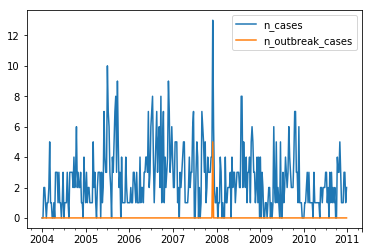

In [36]:
train.plot.line()

In [37]:
train.to_csv('../tests/salmonella_train.csv')

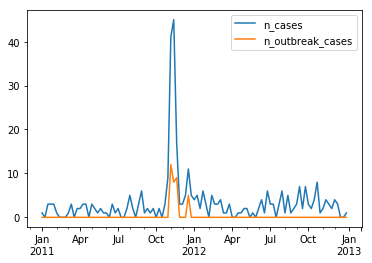

In [38]:
test.plot.line()

In [39]:
test.to_csv('../tests/salmonella_test.csv')

In [57]:
train = pd.DataFrame({'a': [1,2,3], 'b': [1,2,3]})
test = pd.DataFrame({'a': [4,5,6]})

In [12]:
combined = pd.concat((train, test), keys=['train', 'test'], sort=False).reset_index(level=0).rename(columns={'level_0': 'provenance'})
combined

,provenance,n_cases,n_outbreak_cases,outbreak
2004-01-05,train,0,0,False
2004-01-12,train,0,0,False
2004-01-19,train,2,0,False
2004-01-26,train,2,0,False
2004-02-02,train,1,0,False
2004-02-09,train,0,0,False
2004-02-16,train,1,0,False
2004-02-23,train,1,0,False
2004-03-01,train,2,0,False
2004-03-08,train,5,0,False


In [13]:
test.index

DatetimeIndex(['2011-01-03', '2011-01-10', '2011-01-17', '2011-01-24',
               '2011-01-31', '2011-02-07', '2011-02-14', '2011-02-21',
               '2011-02-28', '2011-03-07',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', length=105, freq=None)

In [14]:
combined.index

DatetimeIndex(['2004-01-05', '2004-01-12', '2004-01-19', '2004-01-26',
               '2004-02-02', '2004-02-09', '2004-02-16', '2004-02-23',
               '2004-03-01', '2004-03-08',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', length=470, freq=None)

In [16]:
np.where(combined.provenance == 'test')[0]

array([365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
       391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403,
       404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469])